<a href="https://colab.research.google.com/github/Chiporito93/MLtareas/blob/main/Daniel_Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

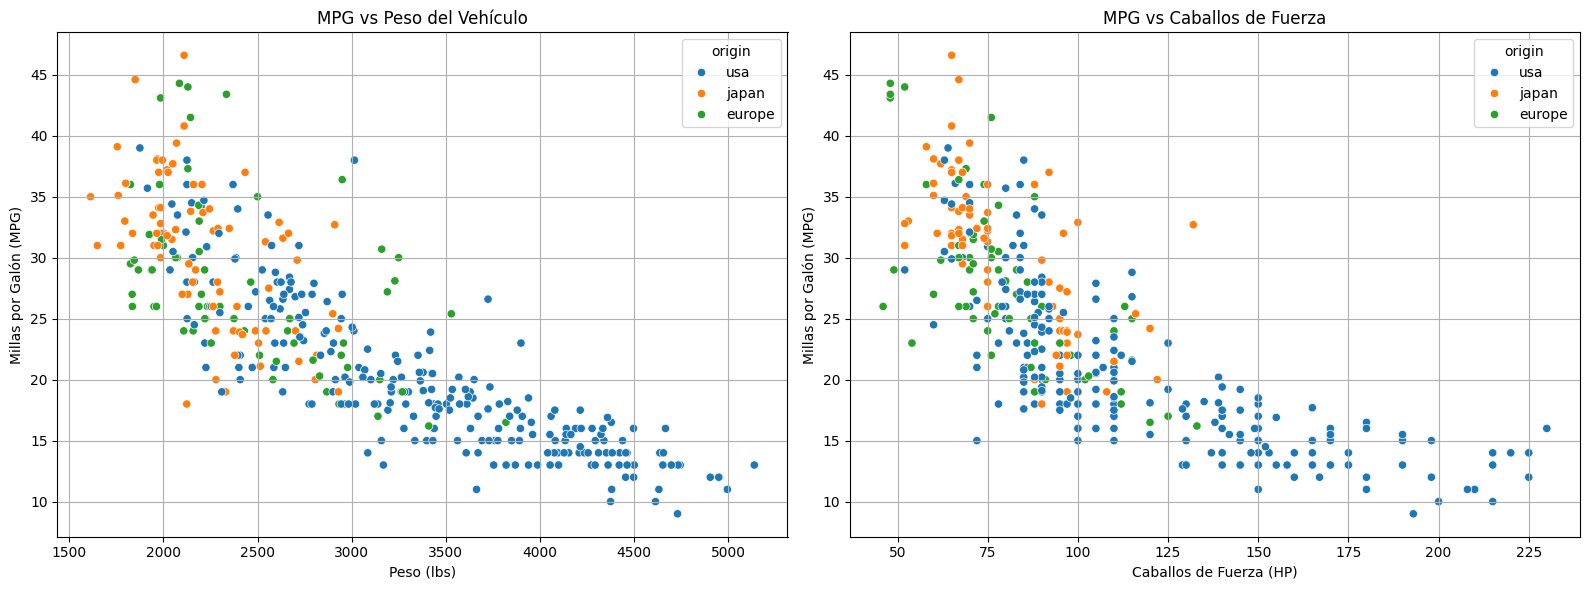

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('mpg')

# Eliminar filas con valores faltantes en 'horsepower'
df = df.dropna(subset=['horsepower'])

# Crear una figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Peso vs MPG
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin', ax=axes[0])
axes[0].set_title('MPG vs Peso del Vehículo')
axes[0].set_xlabel('Peso (lbs)')
axes[0].set_ylabel('Millas por Galón (MPG)')
axes[0].grid(True)

# Gráfico 2: Caballos de Fuerza vs MPG
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='origin', ax=axes[1])
axes[1].set_title('MPG vs Caballos de Fuerza')
axes[1].set_xlabel('Caballos de Fuerza (HP)')
axes[1].set_ylabel('Millas por Galón (MPG)')
axes[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()



2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

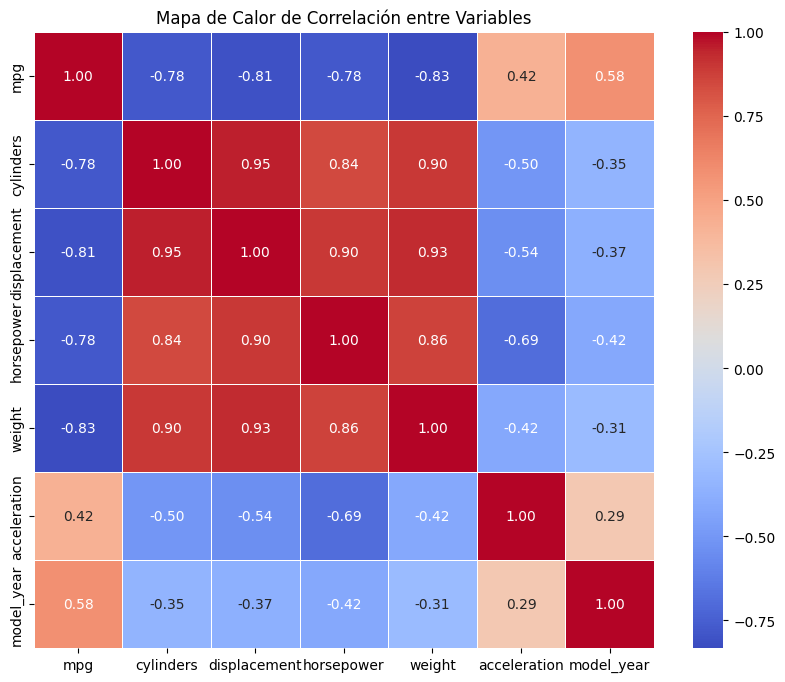

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('mpg')

# Eliminar filas con valores faltantes
df = df.dropna()

# Seleccionar solo las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Dibujar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


3) (1 punto) Entrenar un modelo de regresion lineal


In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = sns.load_dataset('mpg')
df = df.dropna()

# -------------------------------
# PARTE 1: Entrenamiento del modelo
# -------------------------------

# Selección de las variables más correlacionadas con mpg
correlaciones = df.corr(numeric_only=True)['mpg'].sort_values()
print("Correlaciones con mpg:")
print(correlaciones)

# Tomamos las dos variables con mayor correlación negativa con mpg
var1 = correlaciones.index[0]   # mayor correlación negativa (ej: 'weight')
var2 = correlaciones.index[1]   # segunda más correlacionada (ej: 'horsepower')

# Modelo 1: regresión lineal simple con var1
X1 = df[[var1]]
y = df['mpg']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

modelo_simple = LinearRegression()
modelo_simple.fit(X1_train, y_train)
y_pred1 = modelo_simple.predict(X1_test)

# Modelo 2: regresión lineal múltiple con var1 y var2
X2 = df[[var2]]
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)

modelo_multiple = LinearRegression()
modelo_multiple.fit(X2_train, y_train)
y_pred2 = modelo_multiple.predict(X2_test)

Correlaciones con mpg:
weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
model_year      0.580541
mpg             1.000000
Name: mpg, dtype: float64


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [11]:
# -------------------------------
# PARTE 2: Métricas de evaluación
# -------------------------------

# Modelo 1 (simple)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Modelo 2 (múltiple)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\n--- MÉTRICAS DEL MODELO SIMPLE 1---")
print(f"Variable usada: {var1}")
print(f"Coeficiente: {modelo_simple.coef_[0]:.4f}")
print(f"Intercepto: {modelo_simple.intercept_:.4f}")
print(f"MSE: {mse1:.2f}")
print(f"R²: {r2_1:.2f}")

print("\n--- MÉTRICAS DEL MODELO Simple 2 ---")
print(f"Variables usadas: {var2}")
print(f"Coeficientes: {modelo_multiple.coef_}")
print(f"Intercepto: {modelo_multiple.intercept_:.4f}")
print(f"MSE: {mse2:.2f}")
print(f"R²: {r2_2:.2f}")


--- MÉTRICAS DEL MODELO SIMPLE 1---
Variable usada: weight
Coeficiente: -0.0079
Intercepto: 47.2005
MSE: 17.69
R²: 0.65

--- MÉTRICAS DEL MODELO Simple 2 ---
Variables usadas: displacement
Coeficientes: [-0.06222756]
Intercepto: 35.7659
MSE: 21.23
R²: 0.58


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


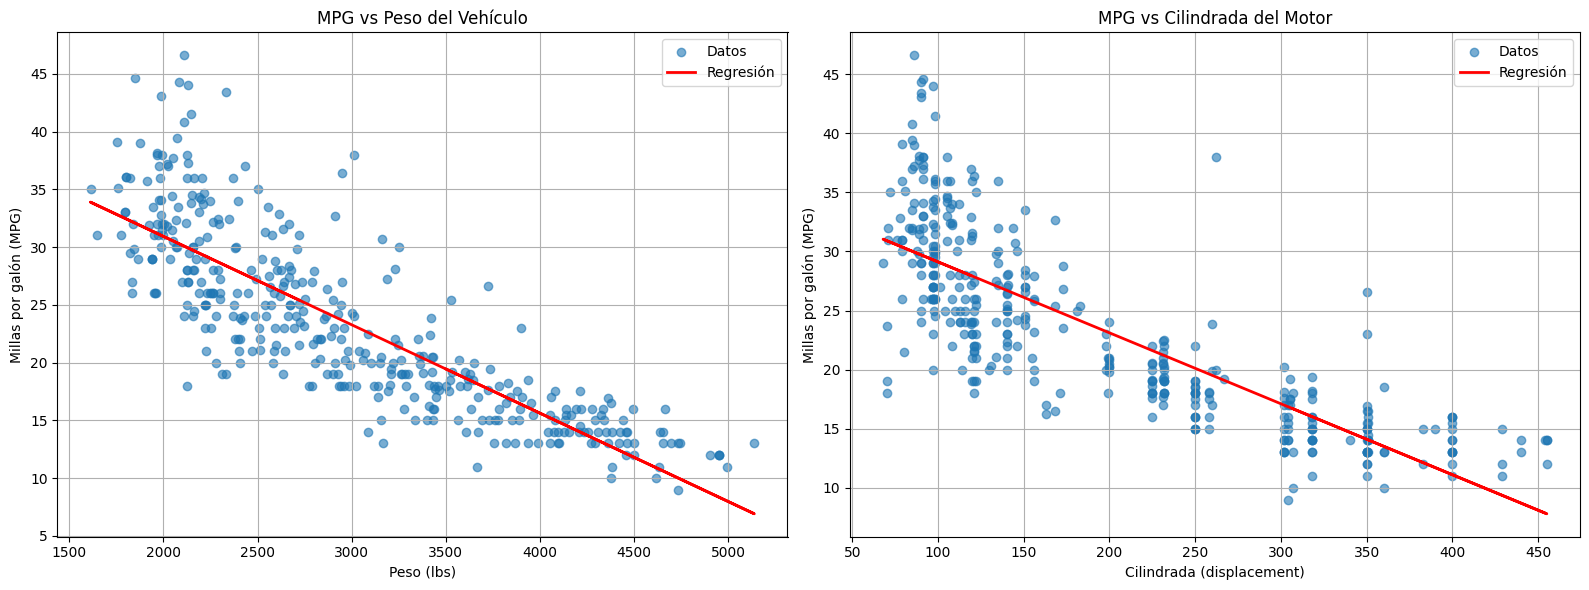

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar y limpiar el dataset
df = sns.load_dataset('mpg')
df = df.dropna()

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --------------------------------
# Gráfico 1: mpg vs weight
# --------------------------------
x1 = df['weight'].values.reshape(-1, 1)
y = df['mpg'].values
modelo1 = LinearRegression()
modelo1.fit(x1, y)
y_pred1 = modelo1.predict(x1)

axes[0].scatter(df['weight'], y, alpha=0.6, label='Datos')
axes[0].plot(df['weight'], y_pred1, color='red', linewidth=2, label='Regresión')
axes[0].set_title('MPG vs Peso del Vehículo')
axes[0].set_xlabel('Peso (lbs)')
axes[0].set_ylabel('Millas por galón (MPG)')
axes[0].grid(True)
axes[0].legend()

# --------------------------------
# Gráfico 2: mpg vs displacement
# --------------------------------
x2 = df['displacement'].values.reshape(-1, 1)
modelo2 = LinearRegression()
modelo2.fit(x2, y)
y_pred2 = modelo2.predict(x2)

axes[1].scatter(df['displacement'], y, alpha=0.6, label='Datos')
axes[1].plot(df['displacement'], y_pred2, color='red', linewidth=2, label='Regresión')
axes[1].set_title('MPG vs Cilindrada del Motor')
axes[1].set_xlabel('Cilindrada (displacement)')
axes[1].set_ylabel('Millas por galón (MPG)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()



6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.